# 201701311 전자공학과 야간 김진호 기말 과제

**수집한 자료: IMDB 영화 리뷰 데이터(터미네이터2, 인피니티 워)**  
**주소)**  
**https://www.imdb.com/title/tt0103064/reviews?ref_=tt_ql_3**    
**https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3**  

**사용한 분석 기법)**  
**1. BeautifulSoup를 사용한 데이터 파싱**    
**2. vader 감정 분석**  
**3. 정규표현식을 통한 전처리**  
**4. nltk 라이브러리를 사용한 전처리**      
**5. 워드클라우드**      

**크롤링한 영화 리뷰들을 위의 분석기법을 통해 특징을 추출해서 추가하고, 정리하여 엑셀파일로 저장을 했습니다.**  
**파일 이름)**  
**imdb_terminator_2.xlsx**  
**imdb_infinity_war.xlsx**     

**리뷰 내용들이 합쳐진 변수(sum_review)에서 의미없는 단어들을 제거하는 등 전처리를 하고 텍스트파일로 저장을 했습니다.**  
**파일 이름)**  
**imdb_terminator_2_review.txt**  
**imdb_infinity_war_review.txt**  

In [32]:
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import pos_tag
# nltk.download('vader_lexicon')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

from openpyxl import Workbook
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

## 프로세스 시작(터미네이터 2)

### openpyxl을 이용해 엑셀 파일로 저장하기 위한 준비 과정

In [33]:
excell = Workbook(write_only=True)
ws = excell.create_sheet()
ws.append(['score', 'title', 'writer', 'date', 'review', 'senti_score'])

## 웹 페이지 불러오기(imdb 사이트)

In [34]:
#url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3' # 어벤져스 인피니티 워
url = 'https://www.imdb.com/title/tt0103064/reviews?ref_=tt_ql_3'  # 터미네이터 2 
print(url)
webpage = urlopen(url)
source = BeautifulSoup(webpage, 'html.parser', from_encoding='utf-8')
review_list = source.findAll('div', {'class': 'imdb-user-review'})
sid = SentimentIntensityAnalyzer()   # VADER 감정분석기
sum_review = ''   

https://www.imdb.com/title/tt0103064/reviews?ref_=tt_ql_3


## 크롤링한 영화 데이터를 엑셀 파일로 저장

In [35]:
for review in review_list:
    # 리뷰 내에서 태그, 클래스를 이용해서 정보를 뽑아내는 부분
    list1 = []
    score = review.find('span').get_text()
    title = review.find('a').get_text().replace('\n', '')
    writer = review.find('span', {'class': 'display-name-link'}).get_text()
    date = review.find('span', {'class': 'review-date'}).get_text()
    content = review.find('div', {'class': 'text show-more__control'}).get_text()

    # 엑셀 파일에 저장하기 위해 list에 각 정보를 추가
    list1.append(score)
    list1.append(title)
    list1.append(writer)
    list1.append(date)
    list1.append(content)
    sum_review = sum_review + content

    # 리뷰 텍스트를 문장별로 쪼개는 전처리 함수
    lines_list = tokenize.sent_tokenize(content)  

    sum = 0
    # 한 리뷰의 각 문장마다 감정 점수 계산 
    for sent in lines_list:
        ss = sid.polarity_scores(sent)
        print(ss['compound'])
        sum = sum+ss['compound']
    sum1 = str(sum/len(lines_list))  
    list1.append(sum1)
    # 지금까지 뽑아냈던 내용들을 openpyxl worksheet에 저장
    ws.append(list1)  

#excell.save('imdb_infinity_war.xlsx')  # 어벤져스 인피니티 워 리뷰 데이터를 엑셀파일로 저장
excell.save('imdb_terminator_2.xlsx')  # 터미네이터 2 리뷰 데이터를 엑셀파일로 저장

-0.5267
0.5267
-0.6908
0.4588
0.4767
0.6249
0.7227
0.0
0.0
0.775
0.6369
0.0
0.4404
0.4588
-0.4939
0.0
0.0
0.5859
-0.7906
0.0
0.0
0.0772
0.7172
0.4753
0.6696
0.8555
-0.2263
0.4588
0.4019
0.5719
0.0
0.0
0.0
0.5719
0.0
0.3612
0.0
0.0
-0.1027
0.34
0.4404
0.0
-0.4376
0.8692
-0.1877
0.0
-0.836
-0.8481
-0.8481
0.2716
0.6841
-0.2787
-0.2808
0.3036
0.0591
-0.0164
0.1406
0.4588
0.8126
0.0
0.6557
-0.7353
0.0
-0.6887
0.6879
0.7755
0.6369
0.6249
-0.4576
0.0
0.4404
-0.9517
0.5168
0.4391
0.3724
0.0
0.0
0.6369
0.5974
0.9313
0.0
0.6494
-0.5848
0.836
-0.1027
-0.8402
0.936
0.0
-0.5423
0.0
-0.5423
-0.296
0.6369
0.0
-0.6705
0.7579
0.0
0.6249
0.0
0.8915
0.6369
-0.6808
0.1406
0.2732
0.9432
0.4382
-0.4588
0.4019
0.0
0.6557
0.6249
0.0
0.6124
0.5719
0.0
0.6249
0.7783
0.9301
0.4404
-0.5994
0.7964
-0.2732
0.3612
0.0
0.893
-0.296
0.8316
0.4926
-0.296
0.0
0.0
-0.4026
-0.8402
0.0
0.6808
0.3818
-0.5719
0.0
-0.4404
0.0772
0.1531
-0.3626
-0.7096
-0.1779
0.8176
0.5478
0.0966
-0.3182
0.0
0.126
0.7184
0.8269
0.8334
-0.625

## 저장된 엑셀 파일 확인

In [36]:
#df = pd.read_excel('imdb_infinity_war.xlsx')
df = pd.read_excel('imdb_terminator_2.xlsx')
df.head()

,score,title,writer,date,review,senti_score
0,\n\n\n\n\n\n10/10\n,Words cannot describe the greatness of this m...,SeminolePhenom,14 October 2005,A Terminator(Arnold Schwarzenegger) was sent f...,0.173878
1,\n\n\n\n\n\n10/10\n,Movie that everyone should see!,851222,13 March 2008,Greetings from Lithuania.WOW! The best word th...,0.275987
2,\n\n\n\n\n\n10/10\n,"the best action film of all time, and NOT due...",red_core,23 February 2004,Disclaimer: If you are a viewer that mainly pr...,0.073338
3,\n\n\n\n\n\n10/10\n,The best action sequel of all time and one of...,ivo-cobra8,6 January 2018,Terminator 2: Judgment Day is (1991) is the be...,0.238442
4,\n\n\n\n\n\n10/10\n,This is the sequel that dreams are made of.,Smells_Like_Cheese,4 August 2002,Normally when people tell you about a sequel t...,0.073726


## 정규표현식을 사용해 score 값 전처리 -> 점수만 추출

In [37]:
a = df["score"][0]
r=re.compile(r"\n(.*?)/")
r.search(a).group(1)

'10'

In [38]:
r=re.compile(r"\n(.*?)/")

for s in df["score"][:20]:
    print(r.search(s).group(1))

10
10
10
10
10
10
10
10
10
10
10
9
10
9
10
10
10
10
10
9


## 전처리한 데이터로 엑셀 업데이트

In [39]:
for i in range(len(df)):
    s = r.search(df["score"][i]).group(1)
    df["score"][i] = int(s)
    
df.to_excel('imdb_terminator_2.xlsx', index=False)
df.head()

,score,title,writer,date,review,senti_score
0,10,Words cannot describe the greatness of this m...,SeminolePhenom,14 October 2005,A Terminator(Arnold Schwarzenegger) was sent f...,0.173878
1,10,Movie that everyone should see!,851222,13 March 2008,Greetings from Lithuania.WOW! The best word th...,0.275987
2,10,"the best action film of all time, and NOT due...",red_core,23 February 2004,Disclaimer: If you are a viewer that mainly pr...,0.073338
3,10,The best action sequel of all time and one of...,ivo-cobra8,6 January 2018,Terminator 2: Judgment Day is (1991) is the be...,0.238442
4,10,This is the sequel that dreams are made of.,Smells_Like_Cheese,4 August 2002,Normally when people tell you about a sequel t...,0.073726


## 영화의 평균평점은 10점 만점에 9.8, 감점 점수 평점은 0.2정도이다.

In [40]:
df.mean(axis=0)

score          9.800000
senti_score    0.205818
dtype: float64

## 워드클라우드 생성 함수

In [41]:
def generate_wordcloud(text):
    """
    text: 모든 리뷰가 다 합쳐진 변수(str)
    
    text 변수를 통해 워드클라우드 생성하고 그 이미지를 출력함.
    """
        
    wordcloud = WordCloud(font_path='framd.ttf',
                          ranks_only=None,
                          relative_scaling = 0.8,
                          stopwords = set(STOPWORDS)
                          ).generate(text)
    plt.figure(figsize=(9, 6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    return wordcloud

## 워드클라우드 시각화

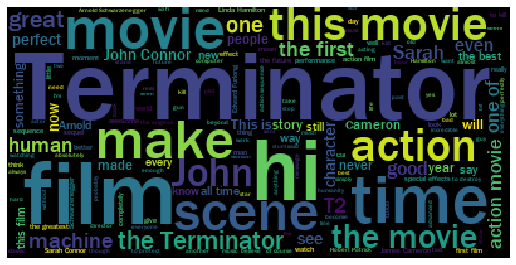

In [42]:
wordcloud = generate_wordcloud(sum_review)

## 상위 20개

In [43]:
li = []
for word in wordcloud.words_:
    li.append(word)

print(li[:20])

['Terminator', 'film', 'hi', 'time', 'movie', 'scene', 'make', 'this movie', 'action', 'John', 'the movie', 'the Terminator', 'great', 'one', 'machine', 'the first', 'T2', 'human', 'Sarah', 'good']


## 소문자로 통일

In [44]:
sum_review1 = sum_review.lower()

print(sum_review[:90])
print(sum_review1[:90])

A Terminator(Arnold Schwarzenegger) was sent from the future to kill the unborn son of Sar
a terminator(arnold schwarzenegger) was sent from the future to kill the unborn son of sar


**어간 추출은 비슷한 단어들을 공통되게 바꿔주기는 하지만, 바뀌면 안 되는 중요한 명사도 같이 바꾸게 돼서    
그 의미를 잃어버리게 하므로 그냥 사용하지 않기로 했다.**

## 길이가 1이나 2인 단어 제거(정규표현식)

In [45]:
shortword = re.compile(r'\W*\b\w{1,2}\b')
sum_review2 = shortword.sub('', sum_review1)
print(sum_review1[:90])
print(sum_review2[:90])

a terminator(arnold schwarzenegger) was sent from the future to kill the unborn son of sar
 terminator(arnold schwarzenegger) was sent from the future kill the unborn son sarah conn


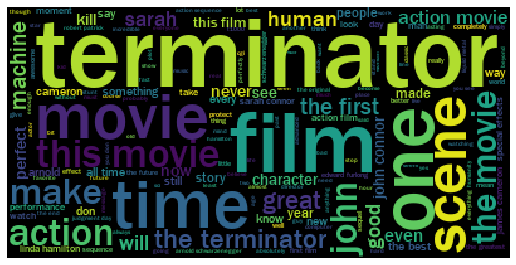

In [46]:
generate_wordcloud(sum_review2)

## 불용어 제거(nltk)

In [47]:
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(sum_review2)

result = []
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

In [48]:
sum_review3 = ' '.join(result)
print(sum_review2[:90])
print(sum_review3[:90])

 terminator(arnold schwarzenegger) was sent from the future kill the unborn son sarah conn
terminator ( arnold schwarzenegger ) sent future kill unborn son sarah connor ( linda hami


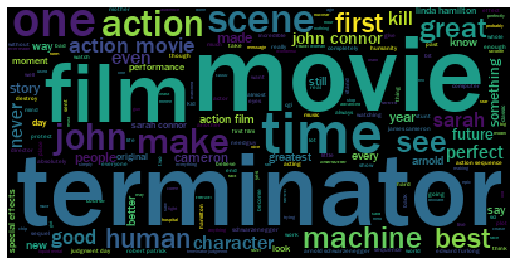

In [49]:
generate_wordcloud(sum_review3)

## 명사만 추출(nltk)

In [50]:
tokenized = word_tokenize(sum_review3)
nouns = [Word for (Word, pos) in pos_tag(tokenized) if(pos[:2] == 'NN')]

sum_review4 = ' '.join(nouns)
print(sum_review3[:90])
print(sum_review4[:90])

terminator ( arnold schwarzenegger ) sent future kill unborn son sarah connor ( linda hami
terminator schwarzenegger future kill son sarah connor hamilton terminator assignment john


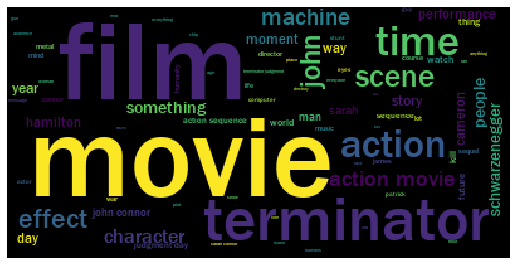

In [51]:
w4 = generate_wordcloud(sum_review4)

In [52]:
li = []
for word in w4.words_:
    li.append(word)

print(li[:30])

['movie', 'film', 'terminator', 'time', 'action', 'scene', 'john', 'effect', 'machine', 'action movie', 'character', 'people', 'something', 'schwarzenegger', 'year', 'story', 'hamilton', 'day', 'cameron', 'way', 'performance', 'moment', 'sarah', 'man', 'john connor', 'future', 'kill', 'world', 'watch', 'thing']


## movie나 film 같은 의미 없는데 많이 들어있는 단어 제거

In [53]:
sum_review5 = sum_review4.replace('movie', '')
sum_review5 = sum_review5.replace('film', '')
sum_review5 = sum_review5.replace('character', '')
sum_review5 = sum_review5.replace('thing', '')
sum_review5 = sum_review5.replace('scene', '')
sum_review5[:90]

'terminator schwarzenegger future kill son sarah connor hamilton terminator assignment john'

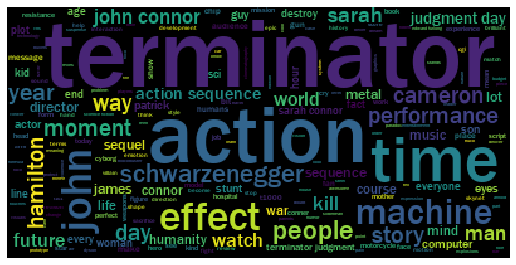

In [54]:
generate_wordcloud(sum_review5)

#### 결과를 보면 terminator, schwarzenegger, action, machine, time, john connor,  cameron,  sarah, judgment day   
#### 등등의 단어들이 리뷰에 많이 포함되어 있다는 것을 확인할 수 있습니다.

## 전처리된 리뷰 데이터를 텍스트 파일로 저장

In [56]:
f = open("imdb_terminator_2_review.txt", "w", -1, "utf-8")
f.write(sum_review5)
f.close()

## 잘 저장되었는지 확인

In [57]:
f = open("imdb_terminator_2_review.txt", "r")
review = f.read()
print(review[:90])

terminator schwarzenegger future kill son sarah connor hamilton terminator assignment john


## 전체 프로세스를 몇 개의 함수로 나눠서 구현해봤습니다.

In [58]:
def data_to_excel(url, fname):
    """
    url: 사이트 주소
    fname: 저장할 엑셀파일 이름
    
    크롤링한 영화 리뷰 데이터에서 감정 점수를 추출하여 열에 추가하고 엑셀 파일로 저장.
    모든 리뷰를 sum_review 변수에 합친 결과를 리턴해줌.
    """
    
    excell = Workbook(write_only=True)
    ws = excell.create_sheet()
    ws.append(['score', 'title', 'writer', 'date', 'review', 'senti_score'])

    webpage = urlopen(url)
    source = BeautifulSoup(webpage, 'html.parser', from_encoding='utf-8')
    review_list = source.findAll('div', {'class': 'imdb-user-review'})
    sid = SentimentIntensityAnalyzer()   # VADER 감정분석기
    sum_review = ''   

    for review in review_list:
        # 리뷰 내에서 태그, 클래스를 이용해서 정보를 뽑아내는 부분
        list1 = []
        score = review.find('span').get_text()
        title = review.find('a').get_text().replace('\n', '')
        writer = review.find('span', {'class': 'display-name-link'}).get_text()
        date = review.find('span', {'class': 'review-date'}).get_text()
        content = review.find('div', {'class': 'text show-more__control'}).get_text()

        # 엑셀 파일에 저장하기 위해 list에 각 정보를 추가
        list1.append(score)
        list1.append(title)
        list1.append(writer)
        list1.append(date)
        list1.append(content)
        sum_review = sum_review + content

        lines_list = tokenize.sent_tokenize(content)  # 리뷰 텍스트를 문장별로 쪼개는 전처리 함수

        sum = 0
        for sent in lines_list:  # 한 리뷰의 각 문장마다 감정 점수 계산 
            ss = sid.polarity_scores(sent)
            #print(ss['compound'])
            sum = sum+ss['compound']
        sum1 = str(sum/len(lines_list))  # 문장들의 평균점수가 그 리뷰의 감정 점수
        list1.append(sum1)
        ws.append(list1)  # 지금까지 뽑아냈던 내용들을 openpyxl worksheet에 저장

    excell.save(fname)  # 데이터를 엑셀파일로 저장
    
    return sum_review

In [59]:
def score_data_cleaning(df, fname):
    """
    df: 수정할 데이터프레임
    fname: 저장할 엑셀파일 이름
    
    score는 값이 \n\n\n\n\n\n9/10\n 같은 느낌으로 불필요한 내용이 포함되어 있다. 
    'n'과 '/' 사이에 있는 9만 추출해서 score에 저장을 함
    """
    
    a = df["score"][0]
    r=re.compile(r"\n(.*?)/")
    r.search(a).group(1)
    r=re.compile(r"\n(.*?)/")

    for i in range(len(df)):
        s = r.search(df["score"][i]).group(1)
        df["score"][i] = int(s)
        
    df.to_excel(fname, index=False)

In [60]:
def review_data_cleaning(sum_review):
    """
    sum_review: 모든 리뷰가 다 합쳐진 변수(str)
    
    1. 소문자로 통일
    2. 길이가 1, 2인 단어 제거
    3. 불용어 제거
    4. 명사만 추출
    5. 의미 없는 단어 제거
    위의 순서대로 전처리를 하고, 그 결과를 리턴해줌,
    """
    
    ## 소문자로 통일
    sum_review1 = sum_review.lower()


    ## 길이가 1이나 2인 단어 제거
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    sum_review2 = shortword.sub('', sum_review1)


    ## 불용어 제거
    stop_words = set(stopwords.words('english')) 
    
    word_tokens = word_tokenize(sum_review2)

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 

    sum_review3 = ' '.join(result)


    ## 명사만 추출
    tokenized = word_tokenize(sum_review3)
    nouns = [Word for (Word, pos) in pos_tag(tokenized) if(pos[:2] == 'NN')]

    sum_review4 = ' '.join(nouns)


    ## movie나 film 같은 의미 없는데 많이 들어있는 단어 제거
    sum_review5 = sum_review4.replace('movie', '')
    sum_review5 = sum_review5.replace('film', '')
    sum_review5 = sum_review5.replace('character', '')
    sum_review5 = sum_review5.replace('thing', '')
    sum_review5 = sum_review5.replace('scene', '')

    return sum_review5

## 프로세스 시작(어벤져스: 인피니티 워)

In [61]:
# 사이트 주소
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3' # 어벤져스 인피니티 워
#url = 'https://www.imdb.com/title/tt0103064/reviews?ref_=tt_ql_3'  # 터미네이터 2 

# 파일 이름
fname="imdb_infinity_war.xlsx"
#fname="imdb_terminator_2.xlsx"

print(url)
print(fname)

https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3
imdb_infinity_war.xlsx


In [62]:
# 데이터를 엑셀 파일로 저장
sum_review = data_to_excel(url, fname) 

# 저장된 엑셀 파일 확인
df = pd.read_excel(fname)
df.head(3)

,score,title,writer,date,review,senti_score
0,\n\n\n\n\n\n9/10\n,Great,MR_Heraclius,23 February 2020,This movie portrays a villain that by far has ...,-0.065733
1,\n\n\n\n\n\n10/10\n,Way better than endgame,michaelhowell12,2 September 2019,This film is way better than endgame!\nThe act...,0.587286
2,\n\n\n\n\n\n10/10\n,Unlike anything ever done in the history of c...,kjames-26542,14 August 2018,This movie is the beginning of the culmination...,-0.012817


In [63]:
# score 값 전처리, 엑셀 파일 업데이트
score_data_cleaning(df, fname)

# 저장된 엑셀 파일 확인
df = pd.read_excel(fname)
df.head(3)

,score,title,writer,date,review,senti_score
0,9,Great,MR_Heraclius,23 February 2020,This movie portrays a villain that by far has ...,-0.065733
1,10,Way better than endgame,michaelhowell12,2 September 2019,This film is way better than endgame!\nThe act...,0.587286
2,10,Unlike anything ever done in the history of c...,kjames-26542,14 August 2018,This movie is the beginning of the culmination...,-0.012817


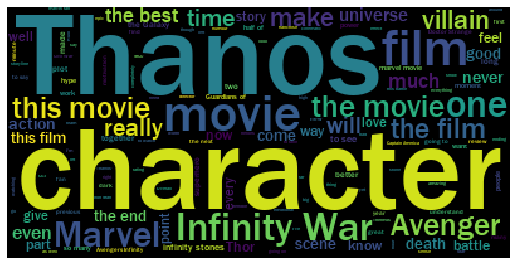

In [64]:
## 워드클라우드 시각화
wordcloud = generate_wordcloud(sum_review)

In [65]:
# 리뷰 데이터 전처리
clean_sum_review = review_data_cleaning(sum_review)
clean_sum_review[:90]

' portrays marvel antagonists conflicts cruelty heroes  mark  way endgame actions writings '

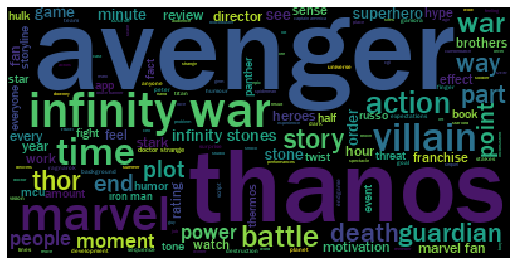

In [66]:
# 최종 워드클라우드 결과
generate_wordcloud(clean_sum_review)

#### 결과를 보시면 avenger, thanos, marvel, infinity war, death, villain,  battle, time, thor, guardians, end
#### 등등의 단어들이 리뷰에 많이 포함되어 있다는 것을 확인할 수 있습니다.

In [68]:
# 전처리된 리뷰 데이터를 텍스트 파일로 저장 
f = open("imdb_infinity_war_review.txt", "w", -1, "utf-8")
f.write(clean_sum_review)
f.close()

In [69]:
# 잘 저장되었는지 확인
f = open("imdb_infinity_war_review.txt", "r")
review = f.read()
print(review[:90])

 portrays marvel antagonists conflicts cruelty heroes  mark  way endgame actions writings 


### 이렇게 함수를 만들어 사용하면 전체 과정이 보기도 좋고 사용하기도 쉬운 것 같습니다.

# 교수님 한 학기 동안 감사했습니다!